Downloading S&P500 Price Data

In [93]:
# Call Yahoo Finance API to download daily stock and index prices
import yfinance as yf
import matplotlib
import pandas as pd
import os

In [94]:
# Downlad price history for a single symbol with .Ticker
nasdaq = yf.Ticker("^IXIC")

In [95]:
# Query Historical Prices
nasdaq = nasdaq.history(period="max")

In [96]:
nasdaq

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1971-02-05 00:00:00-05:00,100.000000,100.000000,100.000000,100.000000,0,0.0,0.0
1971-02-08 00:00:00-05:00,100.839996,100.839996,100.839996,100.839996,0,0.0,0.0
1971-02-09 00:00:00-05:00,100.760002,100.760002,100.760002,100.760002,0,0.0,0.0
1971-02-10 00:00:00-05:00,100.690002,100.690002,100.690002,100.690002,0,0.0,0.0
1971-02-11 00:00:00-05:00,101.449997,101.449997,101.449997,101.449997,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-06-18 00:00:00-04:00,19526.919922,19660.769531,19489.560547,19546.269531,7818790000,0.0,0.0
2025-06-20 00:00:00-04:00,19639.410156,19696.109375,19380.580078,19447.410156,9969140000,0.0,0.0
2025-06-23 00:00:00-04:00,19427.009766,19643.699219,19334.980469,19630.970703,9088000000,0.0,0.0


In [97]:
nasdaq.index

DatetimeIndex(['1971-02-05 00:00:00-05:00', '1971-02-08 00:00:00-05:00',
               '1971-02-09 00:00:00-05:00', '1971-02-10 00:00:00-05:00',
               '1971-02-11 00:00:00-05:00', '1971-02-12 00:00:00-05:00',
               '1971-02-16 00:00:00-05:00', '1971-02-17 00:00:00-05:00',
               '1971-02-18 00:00:00-05:00', '1971-02-19 00:00:00-05:00',
               ...
               '2025-06-11 00:00:00-04:00', '2025-06-12 00:00:00-04:00',
               '2025-06-13 00:00:00-04:00', '2025-06-16 00:00:00-04:00',
               '2025-06-17 00:00:00-04:00', '2025-06-18 00:00:00-04:00',
               '2025-06-20 00:00:00-04:00', '2025-06-23 00:00:00-04:00',
               '2025-06-24 00:00:00-04:00', '2025-06-25 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=13712, freq=None)

#### Cleaning and Visualizing NASDAQ Data

<Axes: xlabel='Date'>

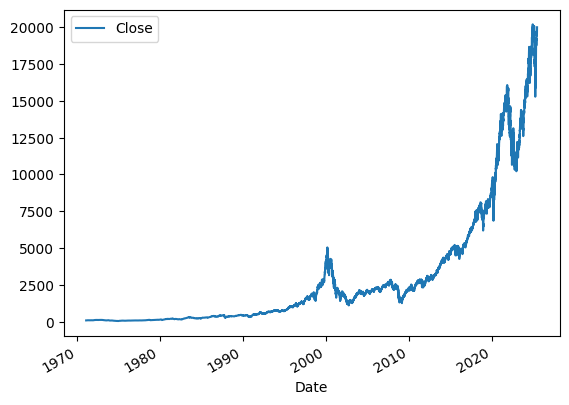

In [98]:
# Plot trend of data using DateTime index
nasdaq.plot.line(y="Close", use_index=True)

In [99]:
# Data cleaning to remove unessacary columns
del nasdaq["Dividends"]
del nasdaq["Stock Splits"]

#### Setting target for Machine Learning

In [100]:
# Set Target (Determing price direction not absolute value)
nasdaq["Tomorrow"] = nasdaq["Close"].shift(-1)

nasdaq

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1971-02-05 00:00:00-05:00,100.000000,100.000000,100.000000,100.000000,0,100.839996
1971-02-08 00:00:00-05:00,100.839996,100.839996,100.839996,100.839996,0,100.760002
1971-02-09 00:00:00-05:00,100.760002,100.760002,100.760002,100.760002,0,100.690002
1971-02-10 00:00:00-05:00,100.690002,100.690002,100.690002,100.690002,0,101.449997
1971-02-11 00:00:00-05:00,101.449997,101.449997,101.449997,101.449997,0,102.050003
...,...,...,...,...,...,...
2025-06-18 00:00:00-04:00,19526.919922,19660.769531,19489.560547,19546.269531,7818790000,19447.410156
2025-06-20 00:00:00-04:00,19639.410156,19696.109375,19380.580078,19447.410156,9969140000,19630.970703
2025-06-23 00:00:00-04:00,19427.009766,19643.699219,19334.980469,19630.970703,9088000000,19912.529297


In [101]:
# Set Target
nasdaq["Target"] = (nasdaq["Tomorrow"] > nasdaq["Close"]).astype(int)

nasdaq

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1971-02-05 00:00:00-05:00,100.000000,100.000000,100.000000,100.000000,0,100.839996,1
1971-02-08 00:00:00-05:00,100.839996,100.839996,100.839996,100.839996,0,100.760002,0
1971-02-09 00:00:00-05:00,100.760002,100.760002,100.760002,100.760002,0,100.690002,0
1971-02-10 00:00:00-05:00,100.690002,100.690002,100.690002,100.690002,0,101.449997,1
1971-02-11 00:00:00-05:00,101.449997,101.449997,101.449997,101.449997,0,102.050003,1
...,...,...,...,...,...,...,...
2025-06-18 00:00:00-04:00,19526.919922,19660.769531,19489.560547,19546.269531,7818790000,19447.410156,0
2025-06-20 00:00:00-04:00,19639.410156,19696.109375,19380.580078,19447.410156,9969140000,19630.970703,1
2025-06-23 00:00:00-04:00,19427.009766,19643.699219,19334.980469,19630.970703,9088000000,19912.529297,1


In [102]:
# Only use data after the year 2000
nasdaq = nasdaq.loc["2000-01-01":].copy()

nasdaq

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2000-01-03 00:00:00-05:00,4186.189941,4192.189941,3989.709961,4131.149902,1510070000,3901.689941,0
2000-01-04 00:00:00-05:00,4020.000000,4073.250000,3898.229980,3901.689941,1511840000,3877.540039,0
2000-01-05 00:00:00-05:00,3854.350098,3924.209961,3734.870117,3877.540039,1735670000,3727.129883,0
2000-01-06 00:00:00-05:00,3834.439941,3868.760010,3715.620117,3727.129883,1598320000,3882.620117,1
2000-01-07 00:00:00-05:00,3711.090088,3882.669922,3711.090088,3882.620117,1634930000,4049.669922,1
...,...,...,...,...,...,...,...
2025-06-18 00:00:00-04:00,19526.919922,19660.769531,19489.560547,19546.269531,7818790000,19447.410156,0
2025-06-20 00:00:00-04:00,19639.410156,19696.109375,19380.580078,19447.410156,9969140000,19630.970703,1
2025-06-23 00:00:00-04:00,19427.009766,19643.699219,19334.980469,19630.970703,9088000000,19912.529297,1


#### Train a machine learning model

In [103]:
# Random Forest can pick up non linear relationships
from sklearn.ensemble import RandomForestClassifier

# n_estimators is number of Random decision models I want to train (test different values higher could mean better accuracy)
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1) # min_sa helps stop overfitting, random_state will rerun predicatable model

train = nasdaq.iloc[:-100] # All rows except last 100
test = nasdaq.iloc[-100:] # Last 100 rows

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,100
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [104]:
from sklearn.metrics import precision_score # Adjust metric to measure preformance

preds =model.predict(test[predictors])

# put into Pandas dataframe
preds = pd.Series(preds, index=test.index)

preds

Date
2025-01-31 00:00:00-05:00    0
2025-02-03 00:00:00-05:00    1
2025-02-04 00:00:00-05:00    1
2025-02-05 00:00:00-05:00    1
2025-02-06 00:00:00-05:00    1
                            ..
2025-06-18 00:00:00-04:00    1
2025-06-20 00:00:00-04:00    1
2025-06-23 00:00:00-04:00    1
2025-06-24 00:00:00-04:00    0
2025-06-25 00:00:00-04:00    0
Length: 100, dtype: int64

In [105]:
precision_score(test["Target"], preds)

0.5632183908045977

<Axes: xlabel='Date'>

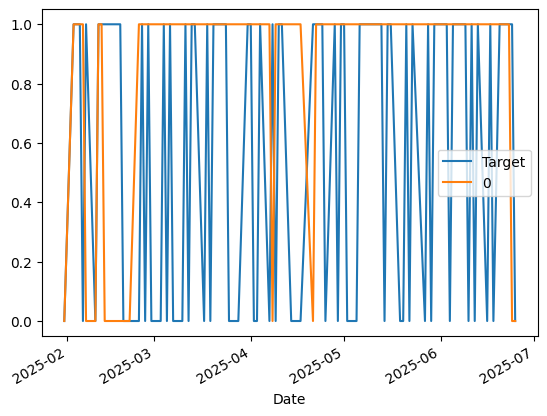

In [107]:
# Plot predictions and combine actul values with predicted values 
combined = pd.concat([test["Target"], preds], axis=1)

combined.plot()

#### Building a Backtesting System